In [1]:
# ignore these two following instructions...
import os
os.chdir("../../../../../src/main/python/")

In [2]:
import random

from matplotlib import pyplot as plt
import numpy as np

from pyLong.dictionnaries.colors import colors as html_colors
from pyLong.profiles.zprofile import zProfile

SQLalchemy is not installed. No support for SQL output.


# PlatRock2DShapeViewer

## Table of contents

- [Import PlatRock2DShapeViewer class](#Import-PlatRock2DShapeViewer-class)

- [Constructor](#Constructor)

## Import PlatRock2DShapeViewer class

In [3]:
from pyLong.toolbox.platrock2d_shape_viewer import PlatRock2DShapeViewer

## Constructor

In [4]:
viewer = PlatRock2DShapeViewer()

In [5]:
output = "C:\\Users\\cr26739\Documents\\GitHub\\pyLong\\docs\\source\\notebooks\\toolbox\\platrock2d_shape_viewer"
output += "\\full_output.hdf5"
viewer.from_hdf5(output)

True

In [6]:
viewer.rocks_number()

100

In [7]:
#viewer.start_data()

In [8]:
#viewer.volumes()

In [9]:
#viewer.densities()

In [10]:
#viewer.inertias()

In [11]:
#viewer.get_contacts(99)

In [12]:
#viewer.x_starts()

In [13]:
#viewer.x_ends()

In [14]:
#viewer.get_z_at(30., 10)

## Terrain profile

Since a PlatRock-2D-shape simulation is based on a natural terrain profile, we create an instance of **zProfile** class and populate it by importing the points contained in the file *terrain.csv*.

In [15]:
terrain = zProfile()
filename = "C:\\Users\\cr26739\Documents\\GitHub\\pyLong\\docs\\source\\notebooks\\toolbox\\platrock2d_shape_viewer\\terrain.csv"
terrain.from_txt(filename)
#terrain.name = "natural terrain"

True

In [16]:
# print the list of points
#terrain.listing()

In [17]:
# set terrain profile style
terrain.label = "natural terrain"
terrain.line_color = "Green"
terrain.line_thickness = 2
terrain.order = 2

In [18]:
trajectories = []
N = 100
for i in random.sample(range(viewer.rocks_number()), N):
    trajectory = viewer.get_trajectory(i, dx=1.)
    if trajectory is not None:
        trajectory.line_color = random.choice(list(html_colors.keys()))
        trajectory.line_thickness = 0.5
        trajectories.append(trajectory)

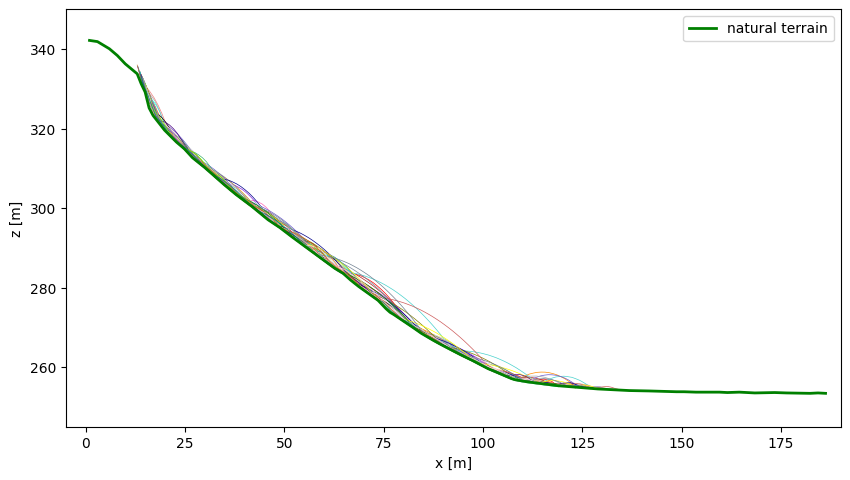

In [19]:
# plot the natural terrain profile
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim((-5, 190))
ax.set_xlabel("x [m]")

ax.set_ylim((245, 350))
ax.set_ylabel("z [m]")

ax.set_aspect('equal')

terrain.plot(ax)
#trajectory.plot(ax)
for trajectory in trajectories:
    trajectory.plot(ax)

ax.legend(loc='best')

plt.show()

In [20]:
len(trajectories)

100

In [21]:
trajectories[0].interpolate(x=16)

In [22]:
trajectories[0].listing()

point 0: x = 16.119 m ; z = 327.193 m
point 1: x = 17.119 m ; z = 323.555 m
point 2: x = 18.119 m ; z = 322.091 m
point 3: x = 18.167 m ; z = 322.021 m


In [44]:
x = 87
dz = []
for trajectory in trajectories:
    z = trajectory.interpolate(x)
    z_tn = terrain.interpolate(x)
    if not (z is None or z_tn is None):
        if z - z_tn >= 0:
            dz.append(z - z_tn)
        else:
            dz.append(0.)

In [45]:
for value in dz:
    print(value)

0.8009706434369832
1.4153043456256569
1.2114610394805254
0.8341639232146463
0.6590472135297887
0.1693995940221953
0.294588428062184
0.46929805222606547
0.0
0.26308924318891513
0.21790273705528307
0.0
0.5045155880660559
0.2746114594825144
3.885728556304514
0.39311090103922197
0.008790109466474405
0.37432800448033277
0.0
0.6789214064172029
0.3164711396263442
1.0627437076651063
0.0
0.8163847623047786
0.0
0.05437753337804452
0.2112702447628294
1.1792443960717378
0.2205822811410485
0.1153456200815981
0.20275448905613302
0.20125223358019184
0.42295910816505966
0.0
0.0
1.411268227050698
0.012576705330900495
5.860189431329388
0.5493364142332666
2.2632329897201657
0.0
0.2251333459256557
0.5718499408307025
0.0
0.0
0.807799206153561
0.28919219795693607
0.3625017922499296
0.0
0.0
0.7265556455978412
0.0
0.46457925162621905
0.0


In [41]:
np.std(dz)

0.3963799914967491